Descriptive Statistics for Cook Time:
count    484.000000
mean      23.200413
std       38.079289
min        0.000000
25%        0.000000
50%       15.000000
75%       30.000000
max      420.000000
Name: cookTime_minutes, dtype: float64


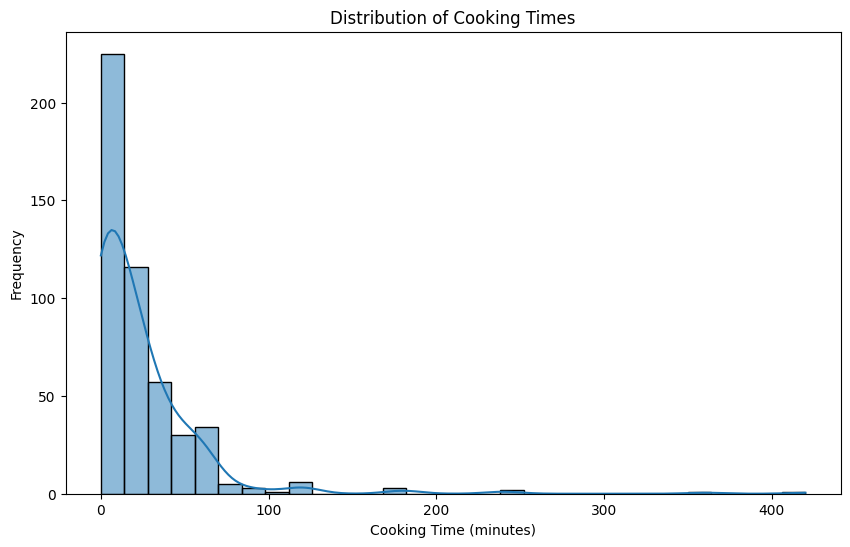

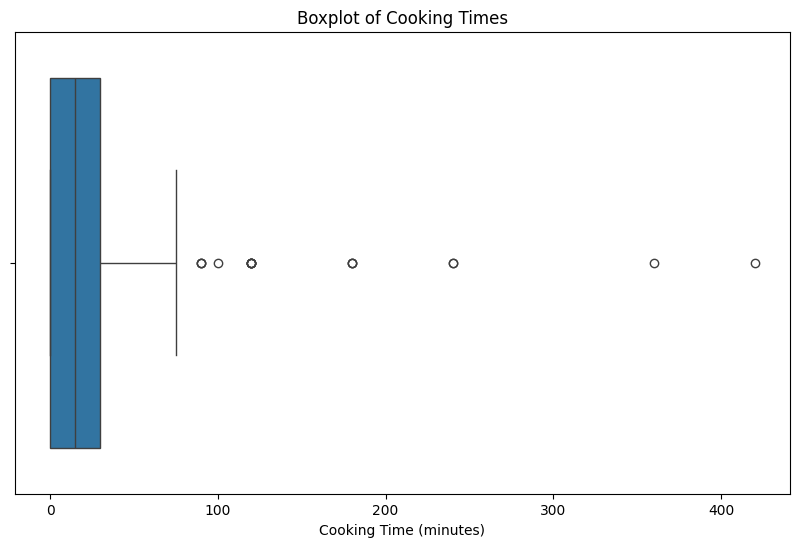

Descriptive Statistics for Prep Time:
count     484.000000
mean       31.836777
std       105.898229
min         0.000000
25%         0.000000
50%        15.000000
75%        20.000000
max      1440.000000
Name: prepTime_minutes, dtype: float64


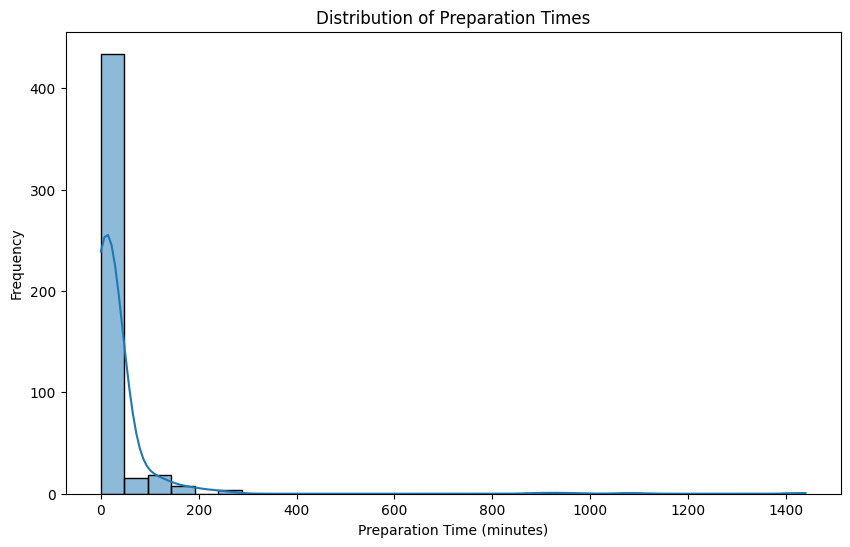

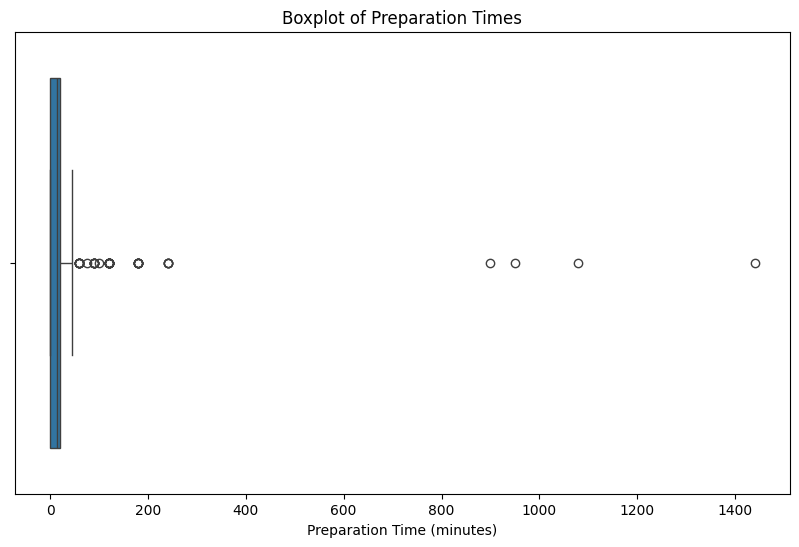

Descriptive Statistics for Recipe Yield:
count     410
unique     91
top         8
freq       71
Name: recipeYield, dtype: object


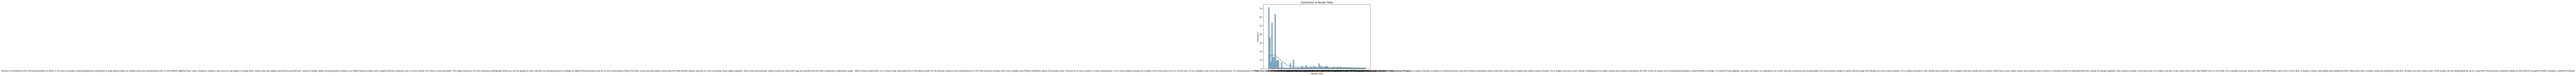

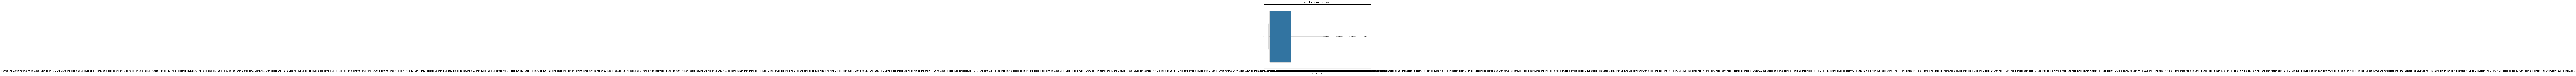

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the data from the CSV file
data = pd.read_csv("recipes-000.csv")

# Step 2: Define the function to convert ISO 8601 duration format to minutes
def iso_to_minutes(iso_str):
    if isinstance(iso_str, str):
        if 'M' in iso_str and 'H' in iso_str:
            hours = int(iso_str.split('H')[0].replace('PT', ''))
            minutes = int(iso_str.split('H')[1].replace('M', ''))
            return hours * 60 + minutes
        elif 'M' in iso_str:
            return int(iso_str.replace('PT', '').replace('M', ''))
        elif 'H' in iso_str:
            hours = int(iso_str.replace('PT', '').replace('H', ''))
            return hours * 60
    return 0

# Step 3: Apply the function to the 'cookTime' and 'prepTime' columns
data['cookTime_minutes'] = data['cookTime'].apply(iso_to_minutes)
data['prepTime_minutes'] = data['prepTime'].apply(iso_to_minutes)

# Step 4: Check descriptive statistics for cookTime
print("Descriptive Statistics for Cook Time:")
print(data['cookTime_minutes'].describe())

# Step 5: Visualize the distribution of cookTime
plt.figure(figsize=(10, 6))
sns.histplot(data['cookTime_minutes'], kde=True, bins=30)
plt.title('Distribution of Cooking Times')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Step 6: Boxplot for cookTime to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['cookTime_minutes'])
plt.title('Boxplot of Cooking Times')
plt.xlabel('Cooking Time (minutes)')
plt.show()

# Step 7: Check descriptive statistics for prepTime
print("Descriptive Statistics for Prep Time:")
print(data['prepTime_minutes'].describe())

# Step 8: Visualize the distribution of prepTime
plt.figure(figsize=(10, 6))
sns.histplot(data['prepTime_minutes'], kde=True, bins=30)
plt.title('Distribution of Preparation Times')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Step 9: Boxplot for prepTime to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['prepTime_minutes'])
plt.title('Boxplot of Preparation Times')
plt.xlabel('Preparation Time (minutes)')
plt.show()

# Step 10: Check descriptive statistics for recipeYield
print("Descriptive Statistics for Recipe Yield:")
print(data['recipeYield'].describe())

# Step 11: Visualize the distribution of recipeYield
plt.figure(figsize=(10, 6))
sns.histplot(data['recipeYield'], kde=True, bins=30)
plt.title('Distribution of Recipe Yields')
plt.xlabel('Recipe Yield')
plt.ylabel('Frequency')
plt.show()

# Step 12: Boxplot for recipeYield to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['recipeYield'])
plt.title('Boxplot of Recipe Yields')
plt.xlabel('Recipe Yield')
plt.show()
